In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.linear_model import LinearRegression
wells = []
##global scope variable for the path to where all the well data is stored
_PATH = "data/"

In [2]:
class Well:
    ##This is a well class that will hold all the properties of a well
    ##and also will be able to do relevant calculations for a given well
    
    ##Once the data is set in the constructor, please do not change the values when they are accessed.
    ##Apparently I can't prevent this in Python, but I can at least advise against it.
    
    def __init__(self, easting, northing, porosity, permeability, PR, YM, wSaturation, oSaturation, thickness, proppant,
                 pumpRate, name, RF, Pa, FVF, oilByMonth, waterByMonth):
        self.easting = easting ##easting, areas with higher
        self.northing = northing ##northing, areas with higher
        self.porosity = porosity ##porosity, definitely something there
        self.permeability = permeability ##permeability,definitely something there
        self.PR = PR ##poissons's ratio, might be something. couple of outliers but general convergence
        self.YM = YM ##young's modulus, pyramid shape, probably something
        self.wSaturation = wSaturation ##water saturation, no correlation to production
        self.oSaturation = oSaturation ##oil saturation, no correlation to production
        self.thickness = thickness ##thickness, no correlation to production
        self.proppant = proppant ##proppant weight, maybe a correlation
        self.pumpRate = pumpRate ##pumpRate, probably a correlation
        self.name = name ##name
        self.RF = RF ##recovery factor, maybe something
        self.Pa = Pa ##average pressure, probably something
        self.FVF = FVF ##formation volume factor
        self.oilByMonth = oilByMonth ##oil produced in each month
        self.waterByMonth = waterByMonth ##water produced in each month
    
    ##returns the length of the well
    def getWellLength(self):
        return self.easting.max()-self.easting.min()
    
    def getEastingMin(self):
        return self.easting.min()
    
    def getEastingMax(self):
        return self.easting.max()
    
    #returns the total oil produced by the well
    def getTotalProduction(self):
        return self.oilByMonth.sum()
    
    ##returns the oil in place for this given well
    def getOilInPlace(self):
        return ((7758 * 360 * self.thickness * self.porosity * (1 - self.wSaturation)) / self.FVF)
    
    ##returns the recoverable reserves of this well
    def getRecoverableReserves(self):
        return (self.getOriginalOilPlace() * self.RF)
    
    ##Returns the production rate
    def InitialProduction(self):
        return (self.oilByMonth[0] * (math.exp((-1 * ((self.oilByMonth[11] - self.oilByMonth[0]) / 12) * time))))
        ##need to figure out how to plug in time (otherwise it will always equal first month production). also could be used
        ##to find the decline over time (where time is difference in production)
    
    def economicLimitROP(self):
        sumOilProduction = 0 
        for i in range(12):
            oil = getOilAtMonth(self, i)
            water = getWaterAtMonth(self, i)
            sumOilProduction += oil
            if(oil < water):
                return sumOilProduction
    
    ##Returns time in years
    def LifeOfReservoir(self):
        return ((1 / ((self.oilByMonth[11] - self.oilByMonth[0]) / 12)) * math.log((self.oilbyMonth[0]) / economicLimitROP(self)))
    
    ##Returns cumulative production in bbl
    def CumulativeProduction(self):
        return ((self.oilbyMonth[0] / declineRate) * math.log(self.oilbyMonth[0] / self.oilbyMonth[11]))
    
    ##this is the kind of functioning as a toString right now, almost no reason for it
    def getName(self):
        return self.name
    
    ##method to return oil produced in a given month
    def getOilAtMonth(self, n):
        if n > 12 or n < 1:
            ##bad
            return -1
        else:
            return self.oilByMonth[n]
    
    ##method to return water produced in a given month
    def getOilAtMonth(self, n):
        if n > 12 or n < 1:
            ##bad
            return -1
        else:
            return self.waterByMonth[n]
    
    ##method to display data for this well
    ##depth will be for getiing data at a given depth in a well. Not sure if or when I should implement this
    def displayData(self, depth = 0):
        if depth == 0:
            data = pd.read_csv(_PATH + self.name + ".csv")
        else:
            data = pd.read_csv(_PATH + self.name + ".csv")
            
        print("Displaying data for: " + self.name)
        print(data)
    
    def getFracStages(self):
        count = 0
        for rate in self.pumpRate:
            if (pd.notnull(rate)):
                count+=1
        return count
    
    def getAvgPumpRate(self):
        return self.pumpRate.mean(skipna = True)
    
    def getAvgProppant(self):
        return self.proppant.mean(skipna = True)
    
    def eastingAvg(self):
        return np.array(self.easting).mean()
    def northingAvg(self):
        return np.array(self.northing).mean()
    
    def porosityAvg(self):
        return np.array(self.porosity).mean()
    def permeabilityAvg(self):
        return np.array(self.permeability).mean()

##method to take the data given, create a well object and store it in wells
def createWells():
    wellProduction = pd.read_csv(_PATH + "wellproduction.csv")
    for i in range(100):
    ##for every well
        ##get all the data from the well production csv
        name = wellProduction.at[i, "well name"]
        ap = wellProduction.at[i, "average pressure (Pa)"]
        RF = wellProduction.at[i, "recovery factor"]
        FVF = wellProduction.at[i, "formation volume factor"]
        oil = wellProduction.iloc[i, 4:16] ##oil per month
        water = wellProduction.iloc[i, 16:28] ##water per month
        ##now that we have the name of the well, we can use that to access its
        ##own csv file and get that data
        wellDF = pd.read_csv(_PATH + name + ".csv")
        e = wellDF["easting"]
        n = wellDF["northing"]
        p = wellDF["porosity"]
        perm = wellDF["permeability"]
        pr = wellDF["Poisson's ratio"]
        ym = wellDF["Young's Modulus"]
        ws = wellDF["water saturation"]
        os = wellDF["oil saturation"]
        thick = wellDF["thickness (ft)"]
        prop = wellDF["proppant weight (lbs)"]
        pump = wellDF["pump rate (cubic feet/min)"]
        ##create a new well
        temp = Well(e, n, p, perm, pr, ym, ws, os, thick, prop, pump, name, RF, ap, FVF, oil, water)
        ##append the new well to the list
        wells.append(temp)

createWells()

In [3]:
bottom = cm.get_cmap('Oranges', 128)
newcolors = np.vstack((bottom(np.linspace(0, 1, 128))))[32:127]
newcmp = ListedColormap(newcolors, name='DarkerOrange')

def makeGraph(xProp, xIsMethod, yProp, yIsMethod, xLabel, yLabel, zProp=-1, zIsMethod=-1, zRepeat=1, zLabel=""):
    #Graph anything
    xCoords = []
    yCoords = []
    zCoords = []
    for well in wells:
        xAttr = getattr(well, xProp)
        yAttr = getattr(well, yProp)
        zAttr = getattr(well, zProp) if zProp is not -1 else -1
        xCoords.append(xAttr() if xIsMethod else xAttr)
        yCoords.append(yAttr() if yIsMethod else yAttr)
        zCoords.append(zAttr() if zIsMethod else zAttr) if zAttr is not -1 else -1
    xCoords = np.array(xCoords).reshape(-1)
    yCoords = np.array(yCoords).reshape(-1)
    zCoords = np.array(zCoords).repeat(zRepeat).reshape(-1)
    plt.figure(dpi=100)
    if zAttr is -1:
        plt.scatter(xCoords, yCoords, s = 4)
    else:
        plt.scatter(xCoords, yCoords, s = 4, c=zCoords, cmap=newcmp)
        plt.colorbar().set_label(zLabel)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)

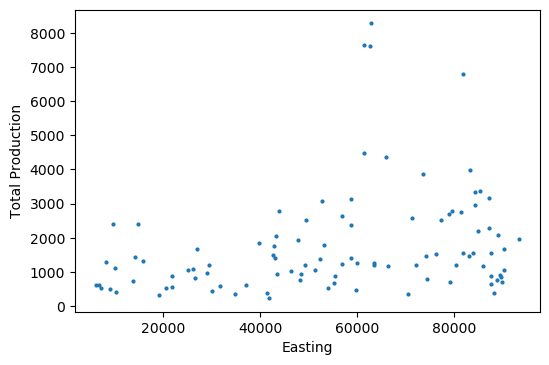

In [4]:
makeGraph("eastingAvg", True, "getTotalProduction", True, "Easting", "Total Production")

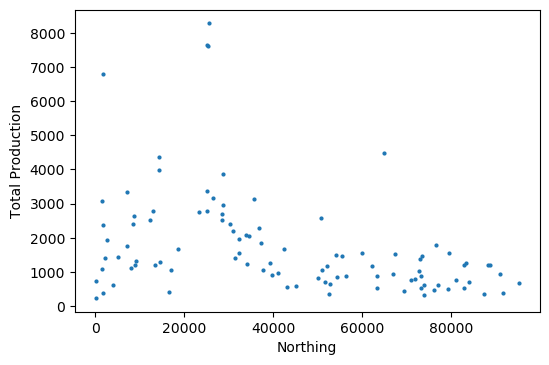

In [5]:
makeGraph("northingAvg", True, "getTotalProduction", True, "Northing", "Total Production")

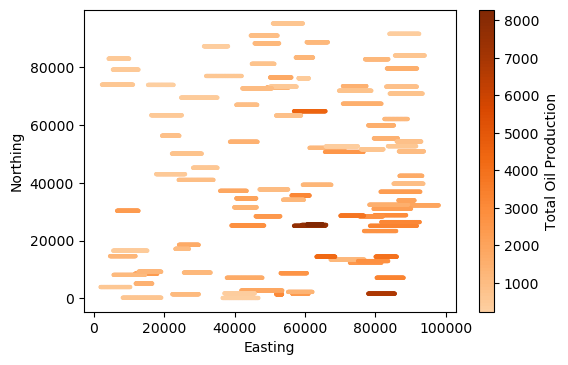

In [6]:
makeGraph("easting", False, "northing", False, "Easting", "Northing", zProp="getTotalProduction", zIsMethod=True, zRepeat=100, zLabel="Total Oil Production")

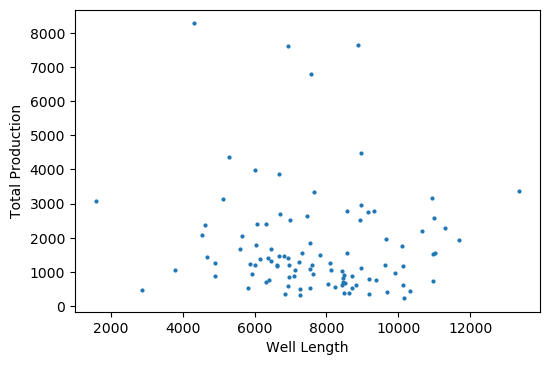

In [7]:
makeGraph("getWellLength", True, "getTotalProduction", True, "Well Length", "Total Production")

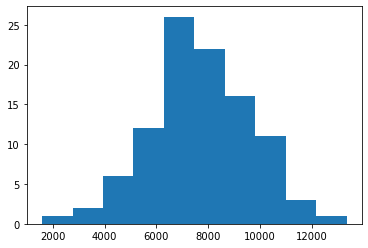

In [8]:
lengths = []
for well in wells:
    lengths.append(well.getWellLength())
plt.hist(lengths);

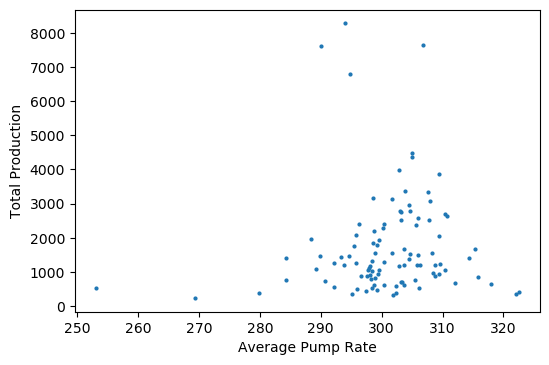

In [9]:
makeGraph("getAvgPumpRate", True, "getTotalProduction", True, "Average Pump Rate", "Total Production")

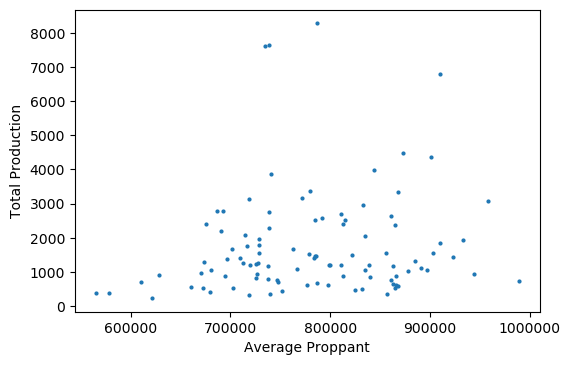

In [10]:
makeGraph("getAvgProppant", True, "getTotalProduction", True, "Average Proppant", "Total Production")

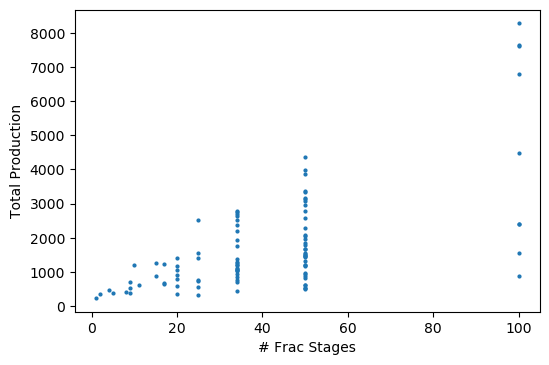

In [11]:
makeGraph("getFracStages", True, "getTotalProduction", True, "# Frac Stages", "Total Production")

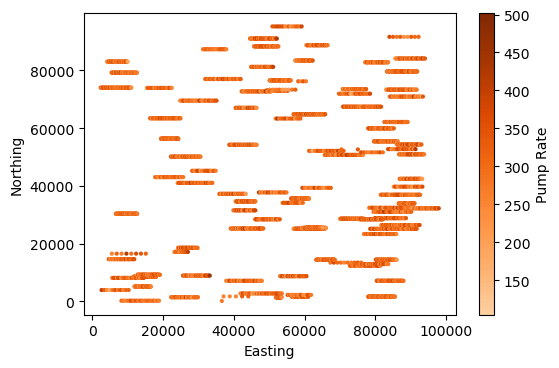

In [12]:
makeGraph("easting", False, "northing", False, "Easting", "Northing", zProp="pumpRate", zIsMethod=False, zLabel="Pump Rate")

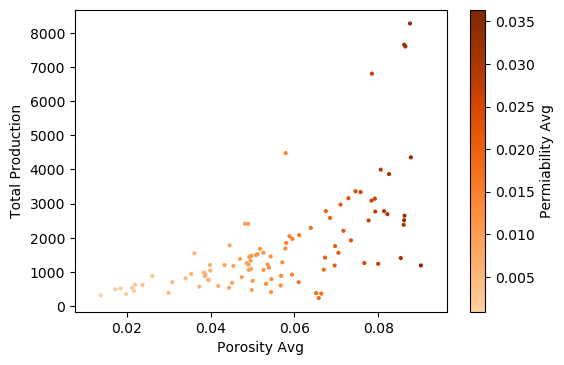

In [13]:
makeGraph("porosityAvg", True, "getTotalProduction", True, "Porosity Avg", "Total Production", zProp="permeabilityAvg", zIsMethod=True, zLabel="Permiability Avg")

In [14]:
wellsAsDots = []
for well in wells:
    wellsAsDots.append(np.linspace(well.getEastingMin(), well.getEastingMax(), 100))

In [15]:
def getDivisions(start, stop, numDivisions):
    return np.linspace(start, stop, numDivisions)

In [28]:
wellVisualBottomDiagonal = []
wellVisualBottomDiagonal = (getDivisions([90930, 500], [98500, 9900], 100))

In [29]:
wellVisualBottomHorizontal = []
wellVisualBottomHorizontal = (getDivisions([66000, 2000], [76000, 2000], 100))

In [30]:
wellVisualRightVertical = []
wellVisualRightVertical = (getDivisions([88000, 17000], [88000, 22000], 100))

In [31]:
wellVisualMiddleVertical = []
wellVisualMiddleVertical = (getDivisions([74000, 18500], [74000, 23000], 100))

In [70]:
wellVisualLeftVertical = []
wellVisualLeftVertical = (getDivisions([62500, 18000], [62500, 23500], 100))

In [78]:
wellVisualHorizontalMiddle = []
wellVisualHorizontalMiddle = (getDivisions([64000, 22500], [70500, 22500], 100))

In [82]:
wellVisualTopVerticalMiddle = []
wellVisualTopVerticalMiddle = (getDivisions([66000, 30500], [66000, 36500], 100))

In [83]:
wellVisualTopLeftDiagonal = []
wellVisualTopLeftDiagonal = (getDivisions([8000, 48000], [9850, 40000], 100))

In [84]:
wellVisualTopHorizontal = []
wellVisualTopHorizontal = (getDivisions([53000, 59250], [64750, 59250], 100))

In [85]:
wellVisualTopVertical = (getDivisions([69000, 59500], [69000, 70000], 100))

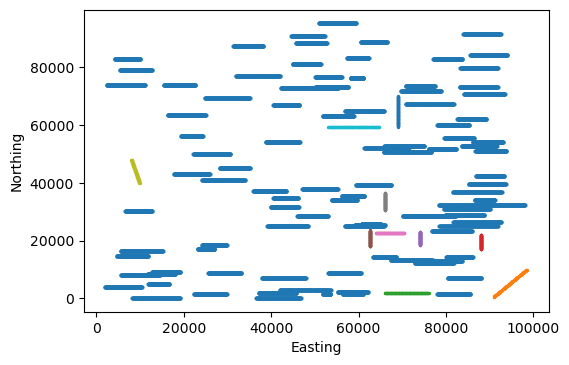

In [88]:
makeGraph("easting", False, "northing", False, "Easting", "Northing")
plt.scatter(wellVisualBottomDiagonal[:,0], wellVisualBottomDiagonal[:,1], s = 2)
plt.scatter(wellVisualBottomHorizontal[:,0], wellVisualBottomHorizontal[:,1], s = 2)
plt.scatter(wellVisualRightVertical[:,0], wellVisualRightVertical[:,1], s = 2)
plt.scatter(wellVisualMiddleVertical[:,0], wellVisualMiddleVertical[:,1], s = 2)
plt.scatter(wellVisualLeftVertical[:,0], wellVisualLeftVertical[:,1], s = 2)
plt.scatter(wellVisualHorizontalMiddle[:,0], wellVisualHorizontalMiddle[:,1], s = 2)
plt.scatter(wellVisualTopVerticalMiddle[:,0], wellVisualTopVerticalMiddle[:,1], s = 2)
plt.scatter(wellVisualTopLeftDiagonal[:,0], wellVisualTopLeftDiagonal[:,1], s = 2)
plt.scatter(wellVisualTopHorizontal[:,0], wellVisualTopHorizontal[:,1], s = 2)
plt.scatter(wellVisualTopVertical[:,0], wellVisualTopVertical[:,1], s = 2)